In [71]:
from gerador import gerador_instancias
import pandas as pd
import matplotlib
import time
import random

## Implementação simples dos algoritmos para construção e consulta em uma Segment Tree de soma

Legenda de parâmetros:
a: array para o qual a seg tree está sendo construída // v: índice do vertice atual da árvore // l: limite esquerdo do intervalo do vertice // r: limite direito do intervalo do vertice.

In [72]:
def constroi(a: list, v: int, l: int, r: int) -> None:  
    if v == 1:     
        global st
        st = [0] * (4*len(a)) # tamanho da arvore é O(4n)
    
    if( l == r ):
        st[v] = a[l] # nós folhas (caso base)
        return None
    else:
        m = (l + r) // 2

        constroi(a, v*2, l, m) # calcula o filho da esquerda recursivamente
        constroi(a, v*2+1, m + 1, r) # calcula o filho da direita recursivamente
        
        st[v] = st[v*2] + st[v*2 + 1] # o valor de um vértice interno é soma dos valores dos seus filhos
        
        return None

Legenda de parâmetros:
v: índice do vertice atual da árvore // il: limite esquerdo do intervalo de interesse // ir: limite direito do intervalo de interesse // l: limite esquerdo do intervalo do vertice // r: limite direito do intervalo do vertice.

In [73]:
def consulta(v: int , il: int , ir: int , l: int , r: int ) -> int:
    global st

    if l > r:
        return 0

    if l <= il and ir <= r:
        return st[v]

    im = (il + ir) // 2

    filho_esq = 0
    filho_dir = 0

    if l <= im:
        filho_esq = consulta(v * 2, il, im, l, min(r, im))
    if r > im:
        filho_dir = consulta(v * 2 + 1, im + 1, ir, max(l, im + 1), r)

    return filho_esq + filho_dir

In [74]:
b = [1, 3, -2, 8,-7]



constroi(b, 1, 0, 4)

print(st)


print(consulta(1, 0, 4, 0, 1))


[0, 3, 2, 1, 4, -2, 8, -7, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4


In [82]:
instancias = gerador_instancias(1000, 5, 1000000)
tamanho_col = []
tempo_construcao_col = []
tempo_consulta_col = []  

for i in range(len(instancias)):
    
    cur_inst = instancias[i]
    tam_inst = len(cur_inst)
    
    #indices aleatorios pra consulta
    idx_aleat_lower = random.randint(0, tam_inst//2) 
    idx_aleat_upper = random.randint(tam_inst//2 + 1, tam_inst)
    
    start_time = time.time()

    arvore = constroi(cur_inst, 1, 0, (len(cur_inst)-1))

    tempo_construcao = time.time() - start_time

    start_time = time.time()

    consulta(1, idx_aleat_lower, idx_aleat_upper, 0, tam_inst)

    tempo_consulta = time.time() - start_time


    print( idx_aleat_lower, idx_aleat_upper, tempo_consulta)

    tamanho_col.append(len(cur_inst))

    tempo_construcao_col.append(tempo_construcao)

    tempo_consulta_col.append(tempo_consulta)

257553 787975 1.5497207641601562e-05
31623 34070 8.821487426757812e-06
445518 635421 2.6226043701171875e-06
29629 49403 2.6226043701171875e-06
78139 120993 3.337860107421875e-06
213769 508114 4.5299530029296875e-06
146053 166993 3.337860107421875e-06
169355 257619 2.384185791015625e-06
34197 291494 2.86102294921875e-06
7612 30926 2.86102294921875e-06
73855 119572 2.86102294921875e-06
23356 60535 5.4836273193359375e-06
158731 293547 9.5367431640625e-06
187788 331007 2.384185791015625e-06
66781 100982 4.5299530029296875e-06
130093 560416 3.0994415283203125e-06
116567 371249 2.6226043701171875e-06
63615 745971 6.198883056640625e-06
396709 722652 2.6226043701171875e-06
57632 94018 3.0994415283203125e-06
178979 696168 3.5762786865234375e-06
85443 612422 2.86102294921875e-06
88589 216957 2.6226043701171875e-06
135474 383839 3.0994415283203125e-06
94966 118605 2.6226043701171875e-06
47764 136126 2.6226043701171875e-06
7231 202645 2.6226043701171875e-06
27940 66432 2.86102294921875e-06
46351 7

In [83]:
df = pd.DataFrame(columns=["tamanho", "tempo_construcao"])

df["tamanho"] = tamanho_col
df["tempo_construcao"] = tempo_construcao_col
df["tempo_consulta"] = tempo_consulta_col 

In [84]:
df

,tamanho,tempo_construcao,tempo_consulta
0,801097,0.315457,0.000015
1,66124,0.050533,0.000009
2,894672,0.287452,0.000003
3,93434,0.052408,0.000003
4,160816,0.051868,0.000003
...,...,...,...
995,350352,0.119694,0.000002
996,812911,0.276002,0.000003
997,761067,0.254775,0.000002
998,622011,0.213822,0.000003


<Axes: xlabel='tamanho', ylabel='tempo_construcao'>

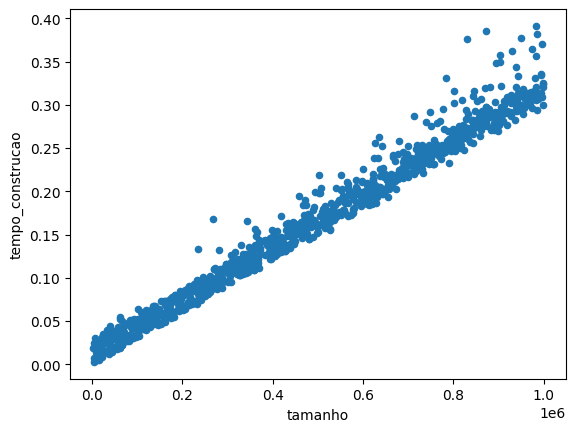

In [85]:
df.plot("tamanho", "tempo_construcao", "scatter")

<Axes: xlabel='tamanho', ylabel='tempo_consulta'>

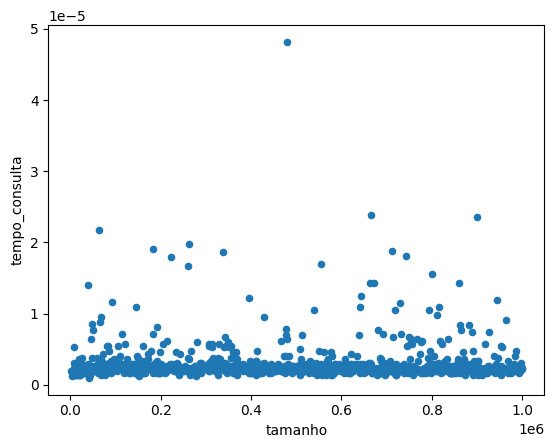

In [86]:
df.plot("tamanho", "tempo_consulta", "scatter")